# CSM148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-4) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 3 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 

random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
data = pd.read_csv('heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [5]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

[Use this area to describe any fields you believe will be problemmatic and why] E.g., All the columns in our dataframe are numeric (either int or float), however our target variable 'sick' is a boolean and may need to be modified.

### Determine if we're dealing with any null values. If so, report on which columns? 

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

[Discuss here]

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [9]:
data['target'] = (data['sick']).astype(int)
del data['sick']

### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

Saving figure attribute_histogram_plots


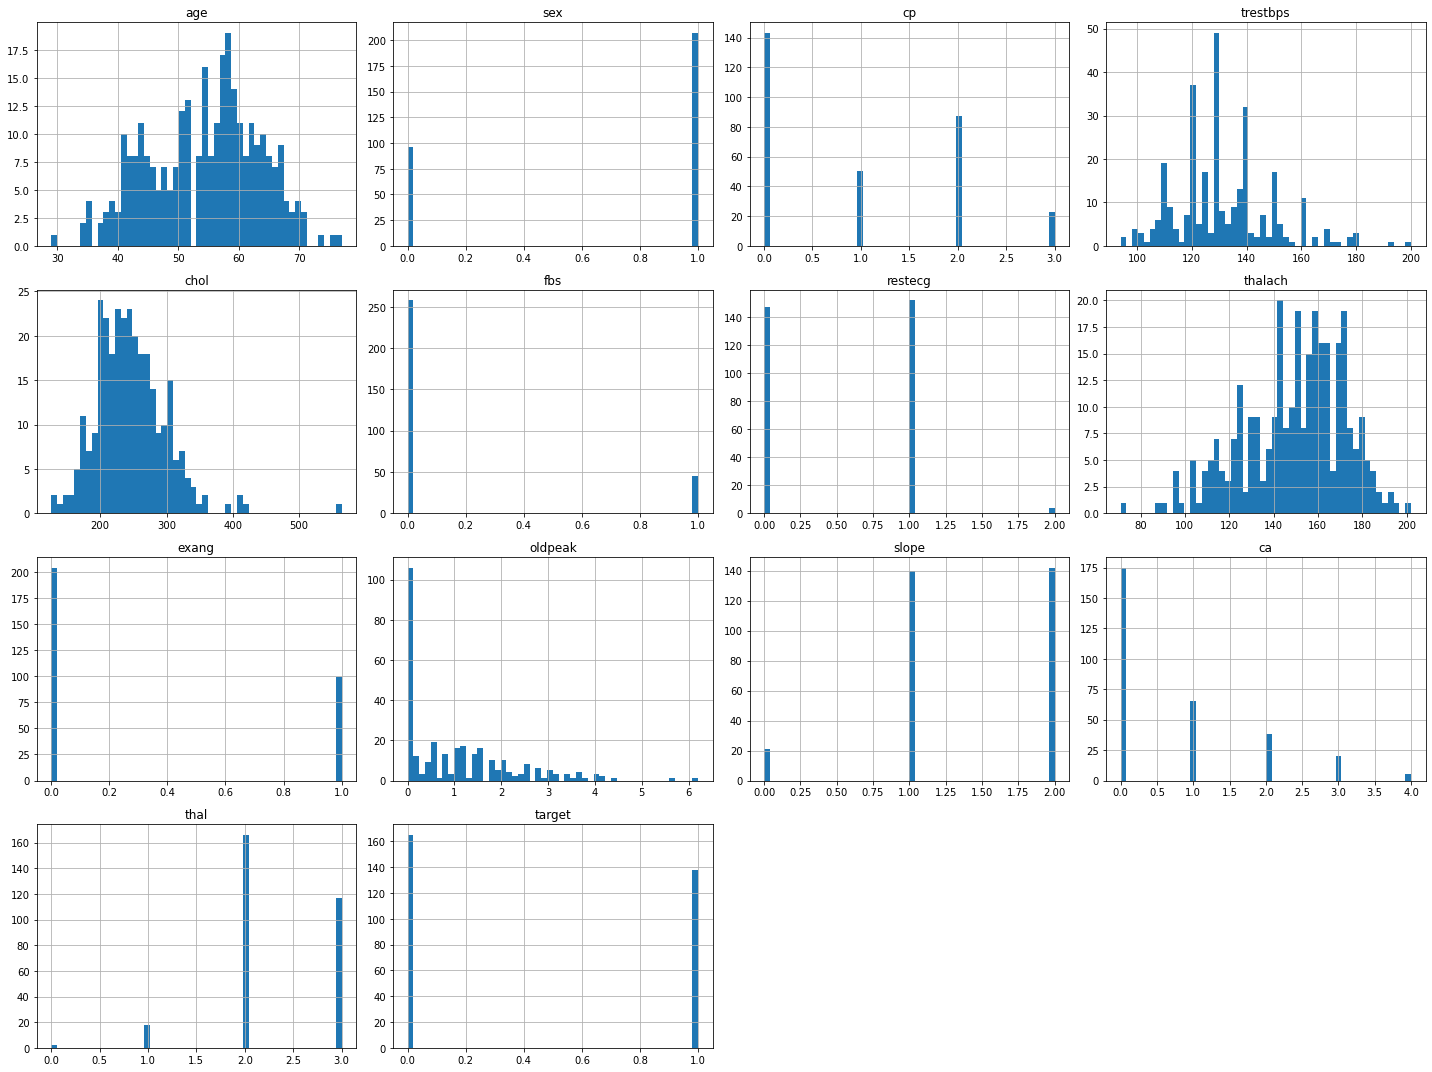

In [10]:
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

0    165
1    138
Name: target, dtype: int64

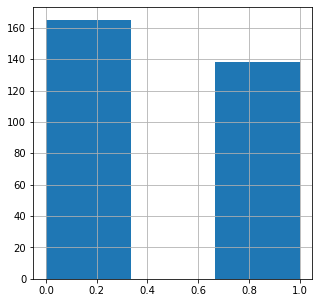

In [11]:
data['target'].hist(bins=3, figsize=(5,5))
data['target'].value_counts()

[Include description of findings here] 

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Discuss prompt here] 

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

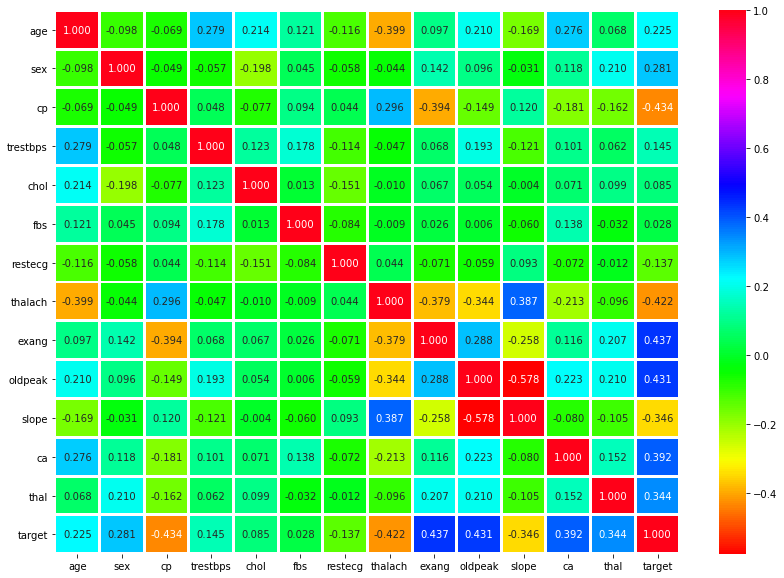

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

[Discuss correlations here] 

## Part 2. Prepare the Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [13]:
target_name = 'target'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [14]:
train_raw, test_raw, target_raw, target_raw_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [15]:
train_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [16]:
print (train_raw.shape, target_raw.shape)
print (test_raw.shape, target_raw_test.shape)

(242, 13) (242,)
(61, 13) (61,)


### In lecture we learned about K-Nearest Neighbor. One thing we noted was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [17]:
# k-Nearest Neighbors algorithm

knn = KNeighborsClassifier()
knn.fit(train_raw, target_raw)

testing_result = knn.predict(test_raw)
predicted = knn.predict(test_raw)
score = knn.predict_proba(test_raw)

In [18]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_raw_test, predicted)))

Accuracy:    0.639344


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler

### Pipeline:

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
heart_num = data.drop(['sex', 'cp', 'restecg', 'thal'], axis=1) 

    
    # remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

heart_num_tr = num_pipeline.fit_transform(heart_num)
numerical_features = list(heart_num)
categorical_features = ['sex', 'cp', 'restecg', 'thal']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

heart_prepared = full_pipeline.fit_transform(data)

In [20]:
heart_prepared

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

### Now split your pipelined data into an 80/20 split and again run the same KNN, and report out on it's accuracy. Discuss the implications of the different results you are obtaining.

In [21]:
train, test, target, target_test = train_test_split(heart_prepared, data_target, test_size=0.8, random_state=0)

In [22]:
train

array([[-1.03300228, -0.94943134,  0.26545431, ...,  0.        ,
         1.        ,  0.        ],
       [-0.15069166,  0.47839125, -0.83609818, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364,  1.90621384,  0.8258933 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.18017482, -0.66386682, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [-0.81242462,  0.36416545,  0.20747787, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40075247, -0.66386682,  0.72926589, ...,  0.        ,
         1.        ,  0.        ]])

In [23]:
test

array([[ 1.72421839,  0.76395577, -1.39653716, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.06248543,  2.19177836, -0.3722866 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.5110413 ,  2.19177836,  0.80656782, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.92271345,  0.36416545, -0.06307888, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.9521966 ,  0.47839125, -0.99070203, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92271345,  0.59261706, -1.33856072, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
print (train.shape, target.shape)
print (test.shape, target_test.shape)

(60, 22) (60,)
(243, 22) (243,)


In [25]:
# k-Nearest Neighbors algorithm

knn = KNeighborsClassifier()
knn.fit(train, target)

testing_result = knn.predict(test)
predicted = knn.predict(test)
score = knn.predict_proba(test)

Accuracy:    0.786008
Precision:   0.764151
Recall:      0.750000
F1 Score:    0.757009
Confusion Matrix: 



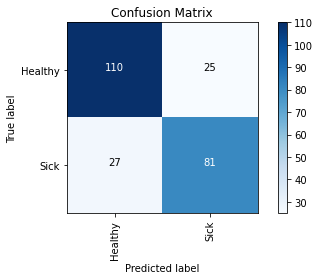

In [26]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n")
draw_confusion_matrix(target_test, predicted, ['Healthy', 'Sick'])

[Discuss Results here]

### Parameter Optimization.  As we saw in lecture, the KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [27]:
r = [1,2,3,5,7,9,10,20,50]

for i in r:


    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train, target)

    testing_result = knn.predict(test)
    predicted = knn.predict(test)
    score = knn.predict_proba(test)

    print("-" * 40)
    print("For an r value of = ", i, "\n")
    print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))

----------------------------------------
For an r value of =  1 

Accuracy:    0.695473
----------------------------------------
For an r value of =  2 

Accuracy:    0.740741
----------------------------------------
For an r value of =  3 

Accuracy:    0.765432
----------------------------------------
For an r value of =  5 

Accuracy:    0.786008
----------------------------------------
For an r value of =  7 

Accuracy:    0.802469
----------------------------------------
For an r value of =  9 

Accuracy:    0.802469
----------------------------------------
For an r value of =  10 

Accuracy:    0.823045
----------------------------------------
For an r value of =  20 

Accuracy:    0.810700
----------------------------------------
For an r value of =  50 

Accuracy:    0.798354


## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier, we introduced in lecture, one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. Report on the same four metrics as the SVM and graph the resulting ROC curve.

Accuracy:    0.818930
Precision:   0.807692
Recall:      0.777778
F1 Score:    0.792453
Confusion Matrix: 
 [[115  20]
 [ 24  84]]


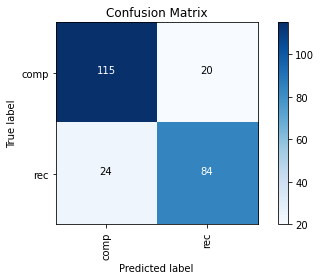

Logistic Model Performance Results:



Text(0, 0.5, 'TPR')

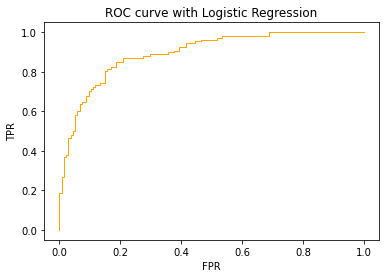

In [28]:
# Logistic Regression
train_data_category = target
test_data_category = target_test

log_reg = LogisticRegression()
log_reg.fit(train, target)
predicted = log_reg.predict(test)
score = log_reg.predict_proba(test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_data_category, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_data_category, predicted))
draw_confusion_matrix(target_test, predicted, ['comp', 'rec'])

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(test_data_category, score)

print("Logistic Model Performance Results:\n")

pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[Provide explanation for each measure here] E.g., <b>Accuracy</b> is one metric for evaluating classification models. Accuracy is the fraction of predictions our model got right, or number of correct predictions/total number of predictions

<b>Precision</b> explores what proportion of positive identifications was actually correct, and is a ratio of the number of correct possitives over the total number of positive guesses (correct and otherwise).

<b>Recall</b> explores what proportion of actual positives was identified correctly, and is the proportion of correct positives over correct positives and false negatives (i.e., the total number of positives that should have been classified.

<b>F1 Score</b> is a measure that combines precision and recall and is the harmonic mean of both precision and recall. It is a more balanced measure that factors both precision and recall together.

<b>Confusion Matrix</b> is a table used to describe the performance of a classifier model showing how often data was labeled both correctly and incorrectly, and the number of each type of correct and incorrect classification. 

Each score tells us important information. While accuracy gives you an indication of the overall performance, and if you're dealing with a well-balanced dataset (like ours is), it can be pretty reflective, however it can be misleading about performance. Here our confusion matrix sheds light on the problem. Our classifier ended up classifying everyone as healthy regardless of their actual state. The resulting accuracy was simply because about half our sample is healthy.

Precision is a measure more focused on 'false positives' and how often our model incorrectly predicts something. For cases like using facial recognition to ID a criminal, a false positive could be very harmful to a person who is misidentified, and we may want build a model that is highly sensitive to avoiding false positives (i.e., it may miss a lot of correct guesses, but when it does guess, it virtually always gets it right. 

Recall is the opposite problem. Here we're worried about false negatives, and overlooking potential positives. Disease diagnosis is a great example of this. Here we'd rather flag a person as potentially worrisome, and through subsequent testing rule it out, then disregard it entirely. 

And F1 Score is a balance of the two. When you want generally high performance across the board minimizing both error-types, an F1 Score is the best generalized measure for it. Here we see that balancing the precision and recall results we arrive at a medicore F1 score.

Finally a confusion matrix is incredibly useful as it shows us not only the magnitude of errors, but the precise composition of those errors. It allows us to further refine our model to avoid certain errors or outcomes. In this case we realize that our classifier uniformly classified everything as healthy and that's why we got the results we did.


### Describe what an ROC curve is and what the results of this graph seem to be indicating

[Discuss] The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively low area under the curve indicating a poorly performing model.

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

Accuracy:    0.806584
Precision:   0.790476
Recall:      0.768519
F1 Score:    0.779343
Confusion Matrix: 
 [[113  22]
 [ 25  83]]


/Users/llevine/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


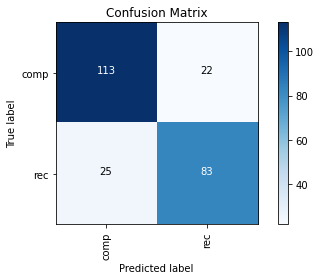

Logistic Model Performance Results:



Text(0, 0.5, 'TPR')

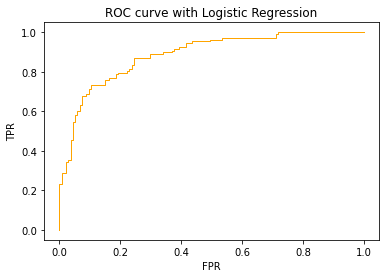

In [29]:
# Logistic Regression
train_data_category = target
test_data_category = target_test

log_reg = LogisticRegression(solver='sag', penalty = 'none', max_iter=10)
log_reg.fit(train, target)
predicted = log_reg.predict(test)
score = log_reg.predict_proba(test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_data_category, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_data_category, predicted))
draw_confusion_matrix(target_test, predicted, ['comp', 'rec'])

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(test_data_category, score)

print("Logistic Model Performance Results:\n")

pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

Accuracy:    0.769547
Precision:   0.716667
Recall:      0.796296
F1 Score:    0.754386
Confusion Matrix: 
 [[101  34]
 [ 22  86]]


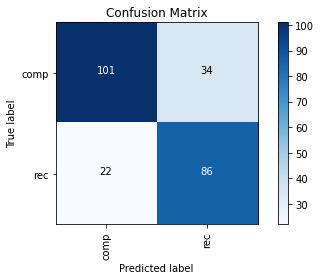

Logistic Model Performance Results:



Text(0, 0.5, 'TPR')

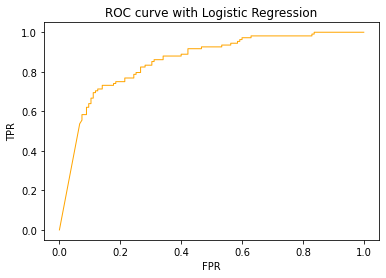

In [30]:
# Logistic Regression
train_data_category = target
test_data_category = target_test

log_reg = LogisticRegression(solver = 'sag', max_iter= 10000, penalty = 'none')
log_reg.fit(train, target)
predicted = log_reg.predict(test)
score = log_reg.predict_proba(test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_data_category, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_data_category, predicted))
draw_confusion_matrix(target_test, predicted, ['comp', 'rec'])

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(test_data_category, score)

print("Logistic Model Performance Results:\n")

pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

### Explain what you changed, and why do you think, even though you 'fixed' the problem, that you may have harmed the outcome. What other Parameters you set may have impacted this result?

[Provide explanation here] By updating the maximum number of iterations, it allowed the model to converge but ended up overfitting on the training data.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

Accuracy:    0.831276
Precision:   0.819048
Recall:      0.796296
F1 Score:    0.807512
Confusion Matrix: 
 [[116  19]
 [ 22  86]]


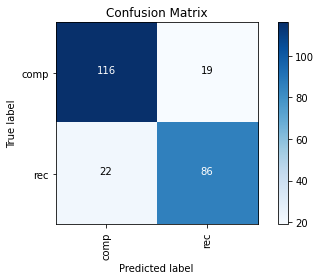

Logistic Model Performance Results:



Text(0, 0.5, 'TPR')

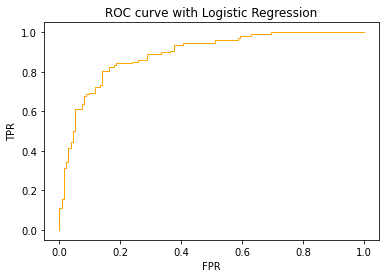

In [31]:
# Logistic Regression
train_data_category = target
test_data_category = target_test

log_reg = LogisticRegression(penalty = 'l1', solver='liblinear')
log_reg.fit(train, target)
predicted = log_reg.predict(test)
score = log_reg.predict_proba(test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(test_data_category, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_data_category, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_data_category, predicted))
draw_confusion_matrix(target_test, predicted, ['comp', 'rec'])

fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(test_data_category, score)

print("Logistic Model Performance Results:\n")

pyplot.figure(1)
pyplot.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=1)
pyplot.title("ROC curve with Logistic Regression")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')

### Explain what what the two solver approaches are, and why the liblinear likely produced the optimal outcome. 

[Provide explanation here] E.g., <b>Library for Large Linear Classification:</b>

It’s a linear classification that supports logistic regression and linear support vector machines (A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics i.e feature value).

The solver uses a coordinate descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes.

<b>Stochastic Average Gradient:</b> (SAG) method optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the SAG method's iteration cost is independent of the number of terms in the sum. However, by incorporating a memory of previous gradient values the SAG method achieves a faster convergence rate than black-box SG methods.

It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

Per the documentation we see that liblinear is the default and recommended approach, whereas Sag is recommended for larger datasets where convergence is more difficult.

### We also played around with different penalty terms (none, L1 etc.) Describe what the purpose of a penalty term is and how an L1 penalty works.

[Discuss prompt here]

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [32]:
# SVM

svm = SVC(probability=True)
svm.fit(train, target)
testing_result = svm.predict(test)
predicted = svm.predict(test)
score = svm.predict_proba(test)


### Report the accuracy, precision, recall, F1 Score, and confusion matrix and ROC Curve of the resulting model.

Accuracy:    0.798354
Precision:   0.792079
Recall:      0.740741
F1 Score:    0.765550
Confusion Matrix: 



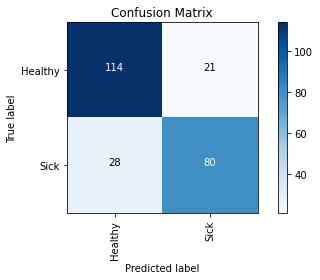

In [33]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n")
draw_confusion_matrix(target_test, predicted, ['Healthy', 'Sick'])

SVM Model Performance Results:



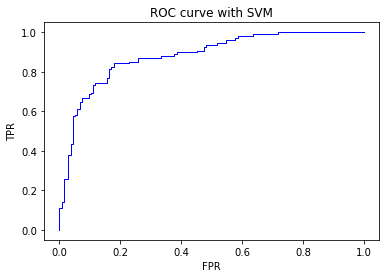

In [34]:
print("SVM Model Performance Results:\n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(target_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [35]:
# SVM

svm = SVC(kernel='linear', probability=True)
svm.fit(train, target)
testing_result = svm.predict(test)
predicted = svm.predict(test)
score = svm.predict_proba(test)

Accuracy:    0.777778
Precision:   0.775510
Recall:      0.703704
F1 Score:    0.737864
Confusion Matrix: 



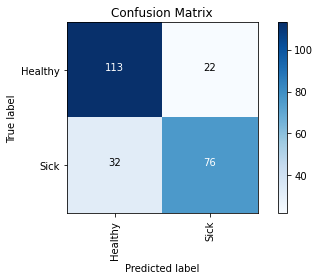

In [36]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n")
draw_confusion_matrix(target_test, predicted, ['Healthy', 'Sick'])

SVM Model Performance Results:



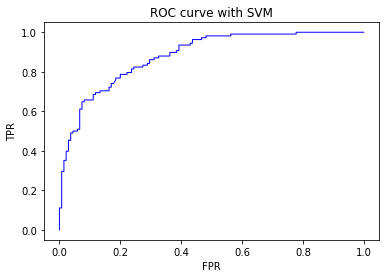

In [37]:
print("SVM Model Performance Results:\n")

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(target_test, score[:, 1], pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm, tpr_svm, color='blue', lw=1)
pyplot.title("ROC curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[Discuss Prompt here]

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Provide Answer here:] E.g., Logistic regression maximizes a likelihood function, whereas SVM classifies by finding a separating hyperplane that is able to divide the space into two half spaces which contain the two classes.

Why their performance differ?
Logistic regression would work well with noisy data that can be represented as a sample from a bernoulli distribution, whereas SVM works on data that is linearly separable.
Their working principles are different, and Logistic regression is almost always used with regularization to ensure that there is no overfitting.

Linear kernel SVMs work well when it is possible to linearly separate data, and do well with high dimension data, considering only the supporting vectors of the separating hyperplane
On the other hand, Logistic regression uses every point in the data-set to estimate a function that maximizes the likelihood of the dataset being generated.

In short, their performance differs as the working principle is different. 

## Baysian (Statistical) Classification

In class we will be learning about Naive Bayes, and statistical classification.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable Y  and dependent feature vector X1 through Xn. 

### Please implement a Naive Bayes Classifier on the pipelined data. For this model simply use the default parameters. Report out the number of mislabeled points that result, along with the accuracy, precision, recall, F1 Score and Confusion Matrix. Refer to documentation on implementing a NB Classifier [here](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicted = gnb.fit(train, target).predict(test)
print("Number of mislabeled points out of a total %d points : %d" % (test.shape[0], (target_test != predicted).sum()))


Number of mislabeled points out of a total 243 points : 95


Accuracy:    0.609053
Precision:   0.740741
Recall:      0.185185
F1 Score:    0.296296
Confusion Matrix: 



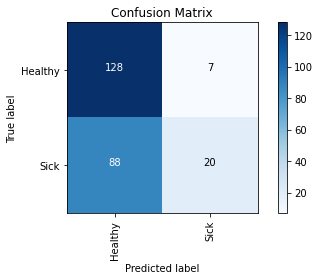

In [39]:
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("Confusion Matrix: \n")
draw_confusion_matrix(target_test, predicted, ['Healthy', 'Sick'])

### Discuss the observed results. What assumptions about our data are we making here and why might those be inacurate?

[Discuss here]

## Cross Validation and Model Selection

You've sampled a number of different classification techniques, leveraging clusters, linear classifiers, and Statistical Classifiers, as well as experimented with tweak different parameters to optimize perfiormance. Based on these experiments you should have settled on a particular model that performs most optimally on the chosen dataset. 

Before our work is done though, we want to ensure that our results are not the result of the random sampling of our data we did with the Train-Test-Split. To ensure otherwise we will conduct a K-Fold Cross-Validation of our top two performing models, assess their cumulative performance across folds, and determine the best model for our particular data. 

## Select your top 2 performing models and run a K-Fold Cross Validation on both (use 10 folds). Report your best performing model.

In [40]:
from sklearn.model_selection import KFold
from sklearn import model_selection

# First we define our cross-validation model parameters. In this case we're going to use KFold, with 10 splits
# where we first shuffle our data before splitting it, and use a random seed to ensure a consistent repeatable shuffle
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 

# Next we define the classifier we will be using for our model (we simply reuse the one we used previously)
model_kfold = LogisticRegression(solver='liblinear', penalty = 'l1')

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
results_kfold = model_selection.cross_val_score(model_kfold, train, target, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("For Logistic Regression our mean accuracy across folds is: %.2f%%" % (results_kfold.mean()*100.0)) 

For Logistic Regression our mean accuracy across folds is: 76.67%


In [41]:
from sklearn.model_selection import KFold
from sklearn import model_selection

# First we define our cross-validation model parameters. In this case we're going to use KFold, with 10 splits
# where we first shuffle our data before splitting it, and use a random seed to ensure a consistent repeatable shuffle
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 

# Next we define the classifier we will be using for our model (we simply reuse the one we used previously)
model_kfold = SVC()

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
results_kfold = model_selection.cross_val_score(model_kfold, train, target, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("For an SVM Regression our mean accuracy across folds is: %.2f%%" % (results_kfold.mean()*100.0)) 

For an SVM Regression our mean accuracy across folds is: 71.67%


[Discuss]